# Set up

In [32]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import numpy.random as random
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import bbknn
import sctk as sk

In [100]:
sc.settings.verbosity = 0            # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white', color_map = 'viridis', figsize = (6, 6))

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.22.4 scipy==1.8.1 pandas==1.4.3 scikit-learn==1.1.1 statsmodels==0.13.2 python-igraph==0.9.11 pynndescent==0.5.7


# Read and log-norm data

In [4]:
adata=sc.read_h5ad('/nfs/team205/heart/anndata_objects/8regions/scVI/for_Purkinje/vCM_aCM/AX-AVN_vCM-aCM_post-scVI.h5ad')

In [5]:
adata

AnnData object with n_obs × n_vars = 39592 × 32732
    obs: 'sangerID', 'combinedID', 'donor', 'donor_type', 'region', 'region_finest', 'age', 'gender', 'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 'flushed', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'scrublet_score', 'scrublet_leiden', 'cluster_scrublet_score', 'doublet_pval', 'doublet_bh_pval', 'batch_key', 'leiden_scVI', 'cell_type', 'cell_state_HCAv1', 'cell_state_scNym', 'cell_state_scNym_confidence', 'cell_state', '_scvi_batch', '_scvi_labels'
    var: 'gene_name_scRNA-0', 'gene_name_snRNA-1', 'gene_id'
    uns: '_scvi', 'cell_or_nuclei_colors', 'cell_state_HCAv1_colors', 'cell_state_colors', 'cell_state_scNym_colors', 'cell_type_colors', 'donor_colors', 'kit_10x_colors', 'leiden_scVI_colors', 'region_colors'
    obsm: 'X_scVI', 'X_umap', '_scvi_extra_continuous', 'latent_gene_encoding'
    layers: 'scvi_normalized'
    obsp: 'connectivities

In [6]:
print(adata.X.data[:5])
print(adata.var[:5])

[1. 1. 1. 1. 1.]
                     gene_name_scRNA-0 gene_name_snRNA-1          gene_id
gene_name_multiome-2                                                     
MIR1302-2HG                MIR1302-2HG       MIR1302-2HG  ENSG00000243485
FAM138A                        FAM138A           FAM138A  ENSG00000237613
OR4F5                            OR4F5             OR4F5  ENSG00000186092
AL627309.1                  AL627309.1        AL627309.1  ENSG00000238009
AL627309.3                  AL627309.3        AL627309.3  ENSG00000239945


In [7]:
adata.layers["counts"] = adata.X.copy()

In [8]:
sc.pp.normalize_per_cell(adata)
sc.pp.log1p(adata)

In [9]:
print(adata.X.data[:5])
print(adata.var[:5])

[0.4275917 0.4275917 0.4275917 0.4275917 0.4275917]
                     gene_name_scRNA-0 gene_name_snRNA-1          gene_id
gene_name_multiome-2                                                     
MIR1302-2HG                MIR1302-2HG       MIR1302-2HG  ENSG00000243485
FAM138A                        FAM138A           FAM138A  ENSG00000237613
OR4F5                            OR4F5             OR4F5  ENSG00000186092
AL627309.1                  AL627309.1        AL627309.1  ENSG00000238009
AL627309.3                  AL627309.3        AL627309.3  ENSG00000239945


In [70]:
adata.raw=adata

# Plot data

In [115]:
sc.pp.neighbors(adata, use_rep="X_scVI", n_neighbors=10, n_pcs=40)
sc.tl.umap(adata,
          min_dist=0.1)

In [122]:
sc.tl.leiden(adata,
            resolution=0.3)

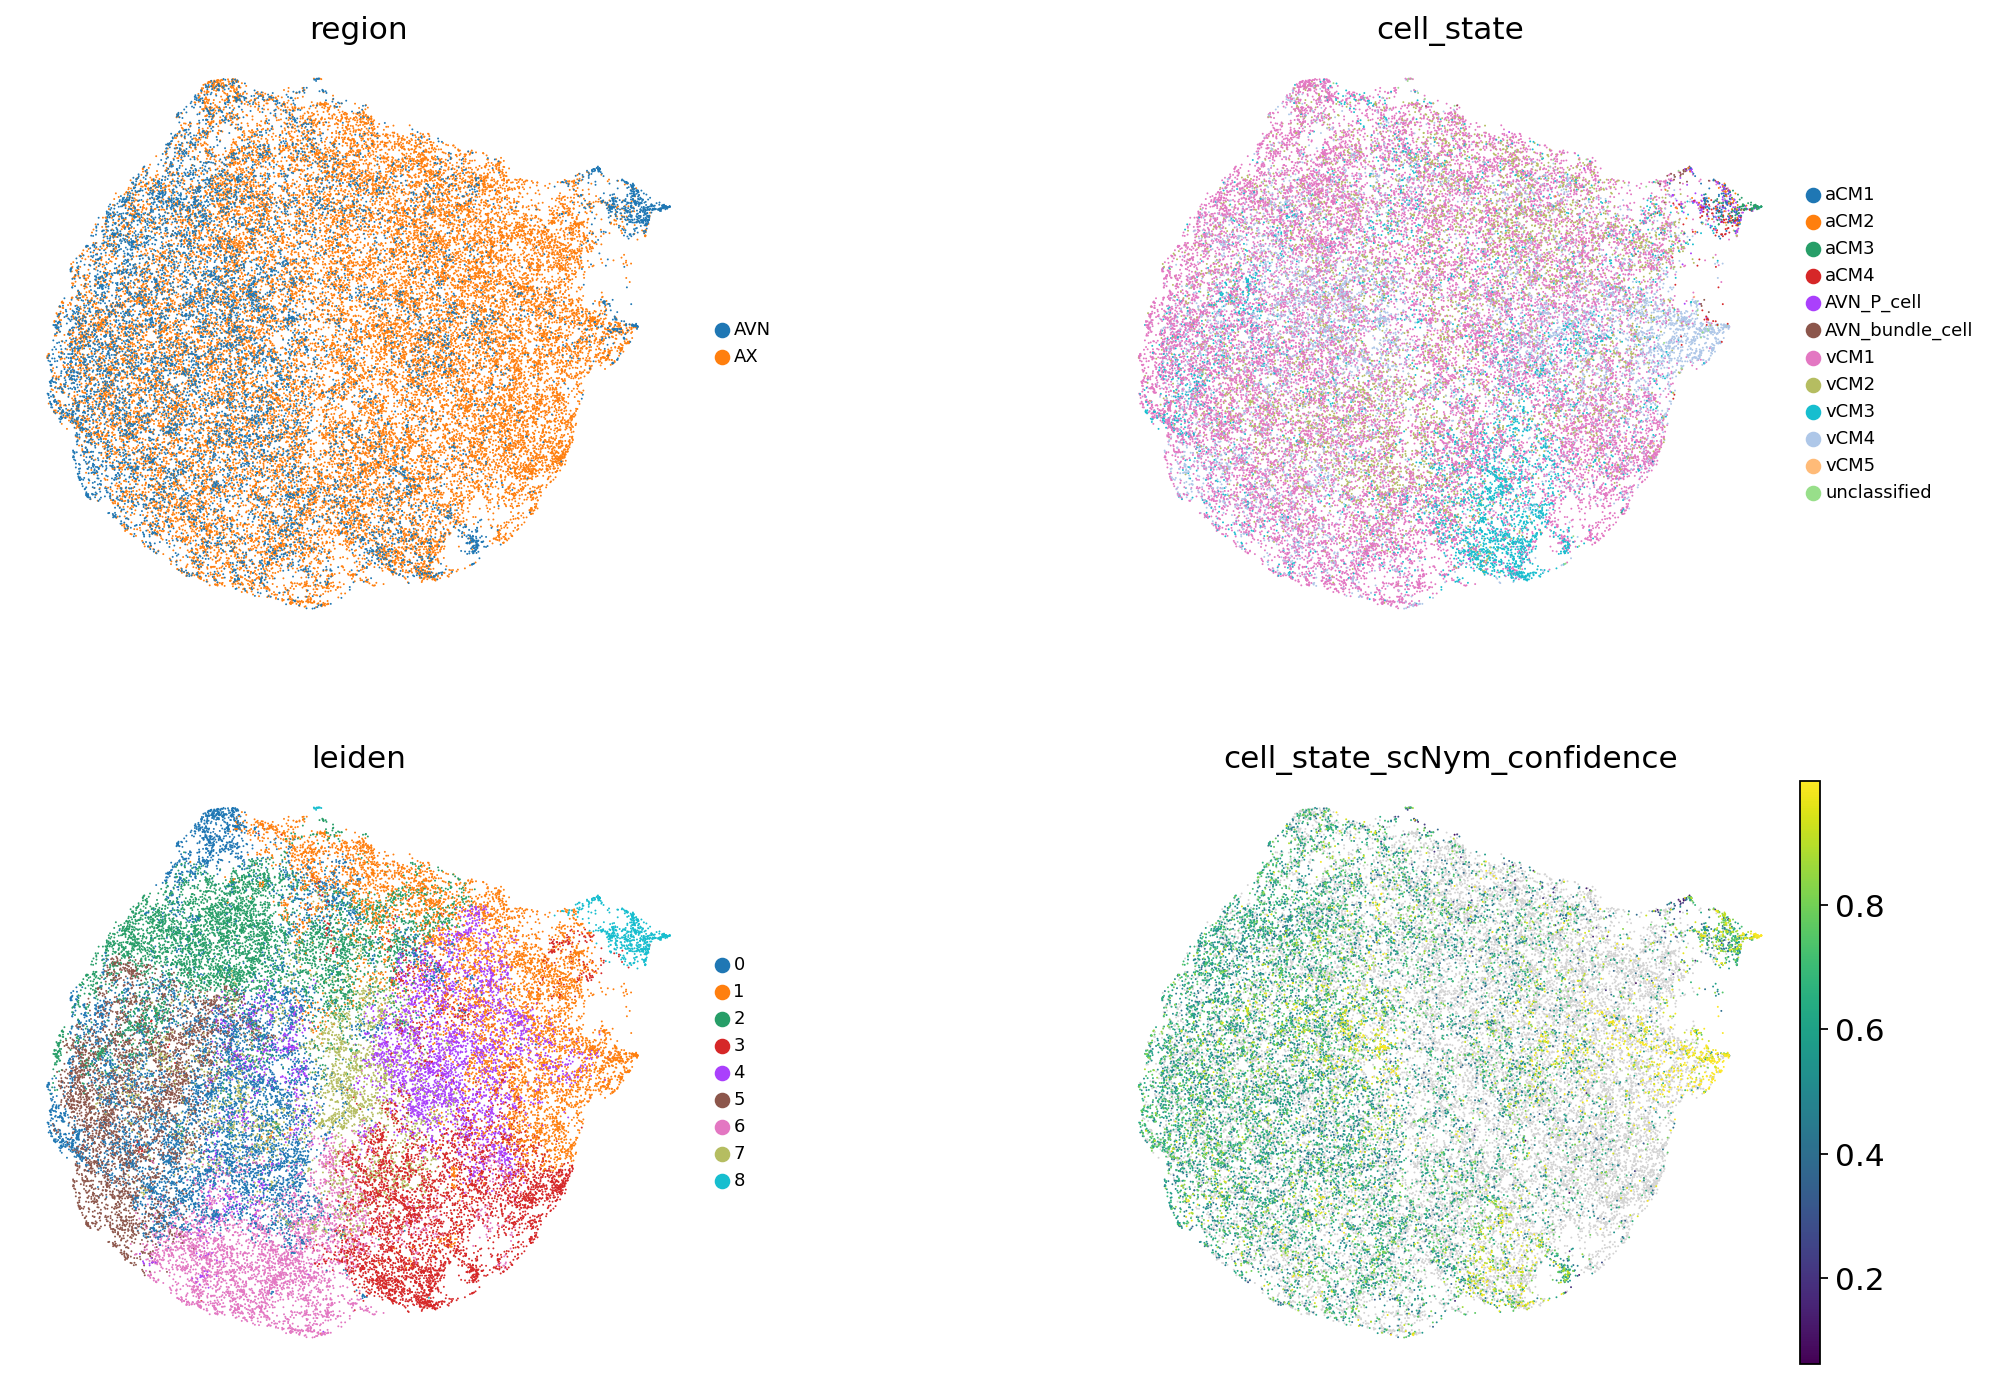

In [123]:
# Plot re-clustered
sc.pl.umap(adata, color=['region','cell_state','leiden','cell_state_scNym_confidence'], legend_fontsize = 'xx-small', frameon = False, wspace=0.45, ncols = 2)

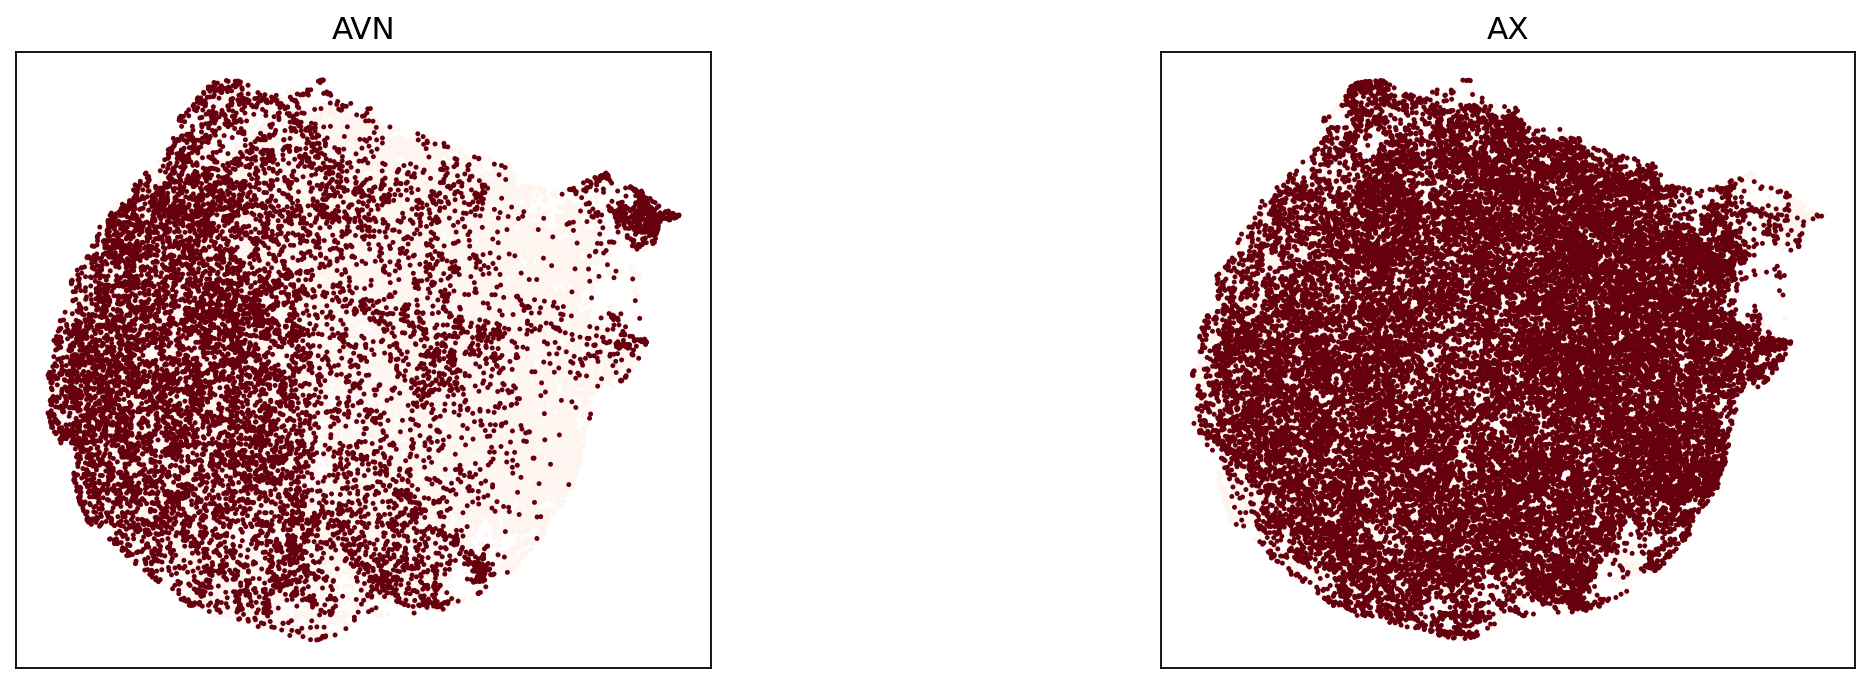

In [125]:
sk.highlight(adata,
             basis="umap",
             groupby="region",
             wspace=0.5, figsize=(5, 5), size=20,
            ncols=6)

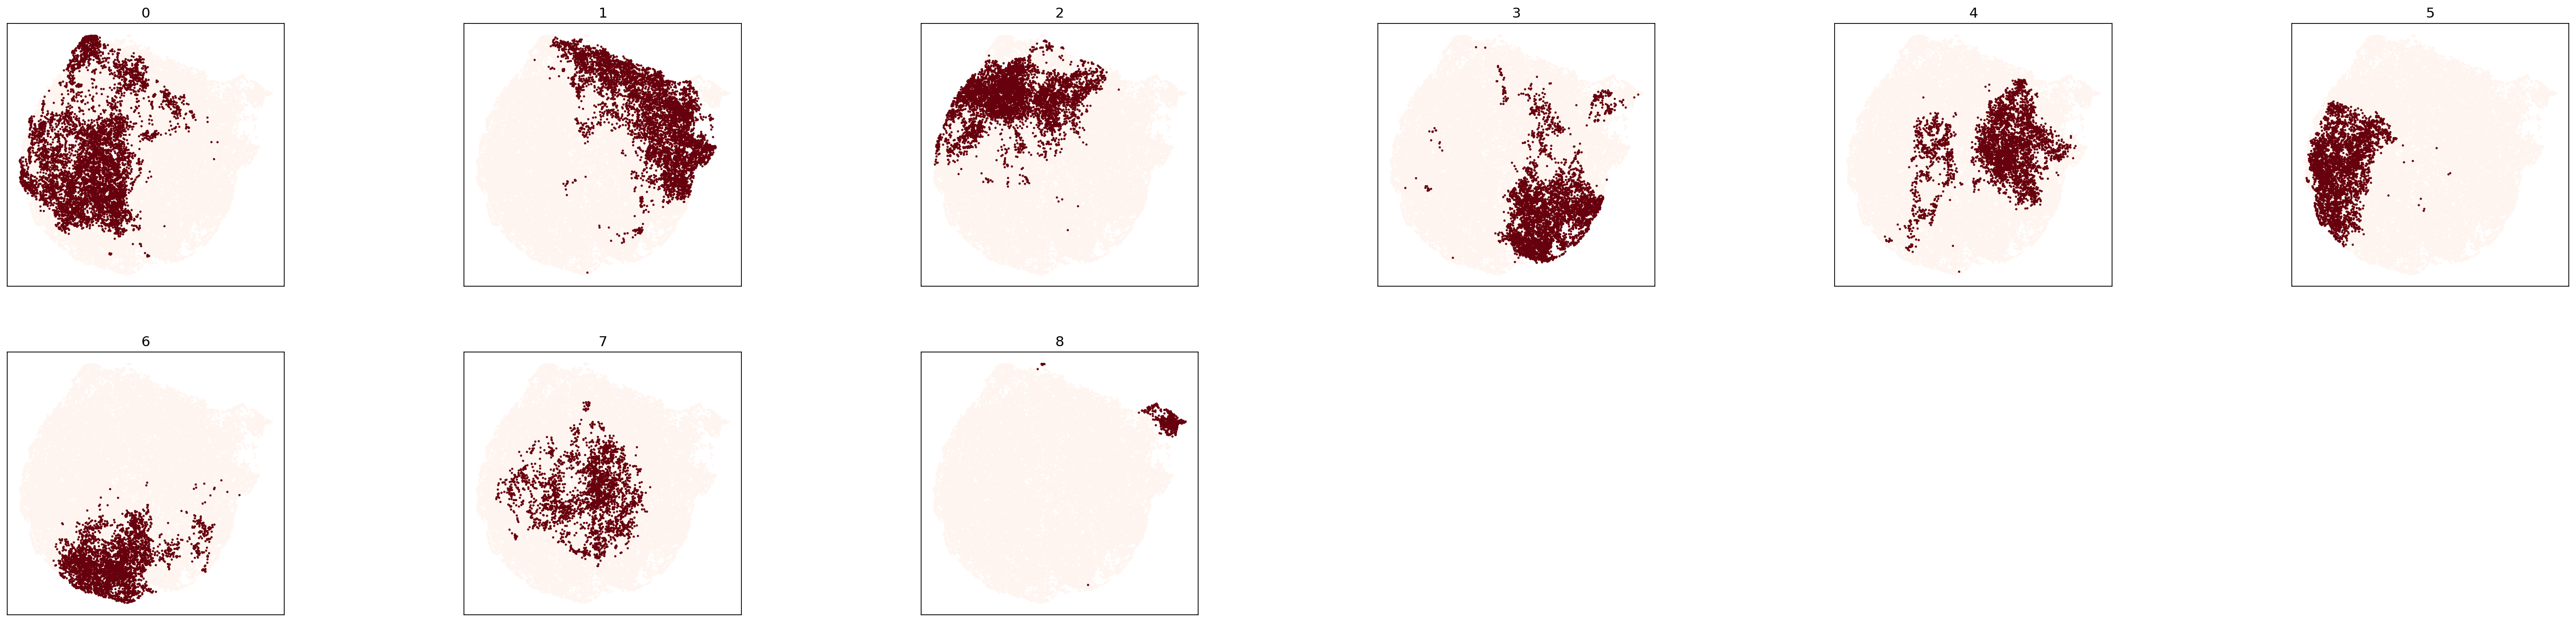

In [126]:
sk.highlight(adata,
             basis="umap",
             groupby="leiden",
             wspace=0.5, figsize=(5, 5), size=20,
            ncols=6)

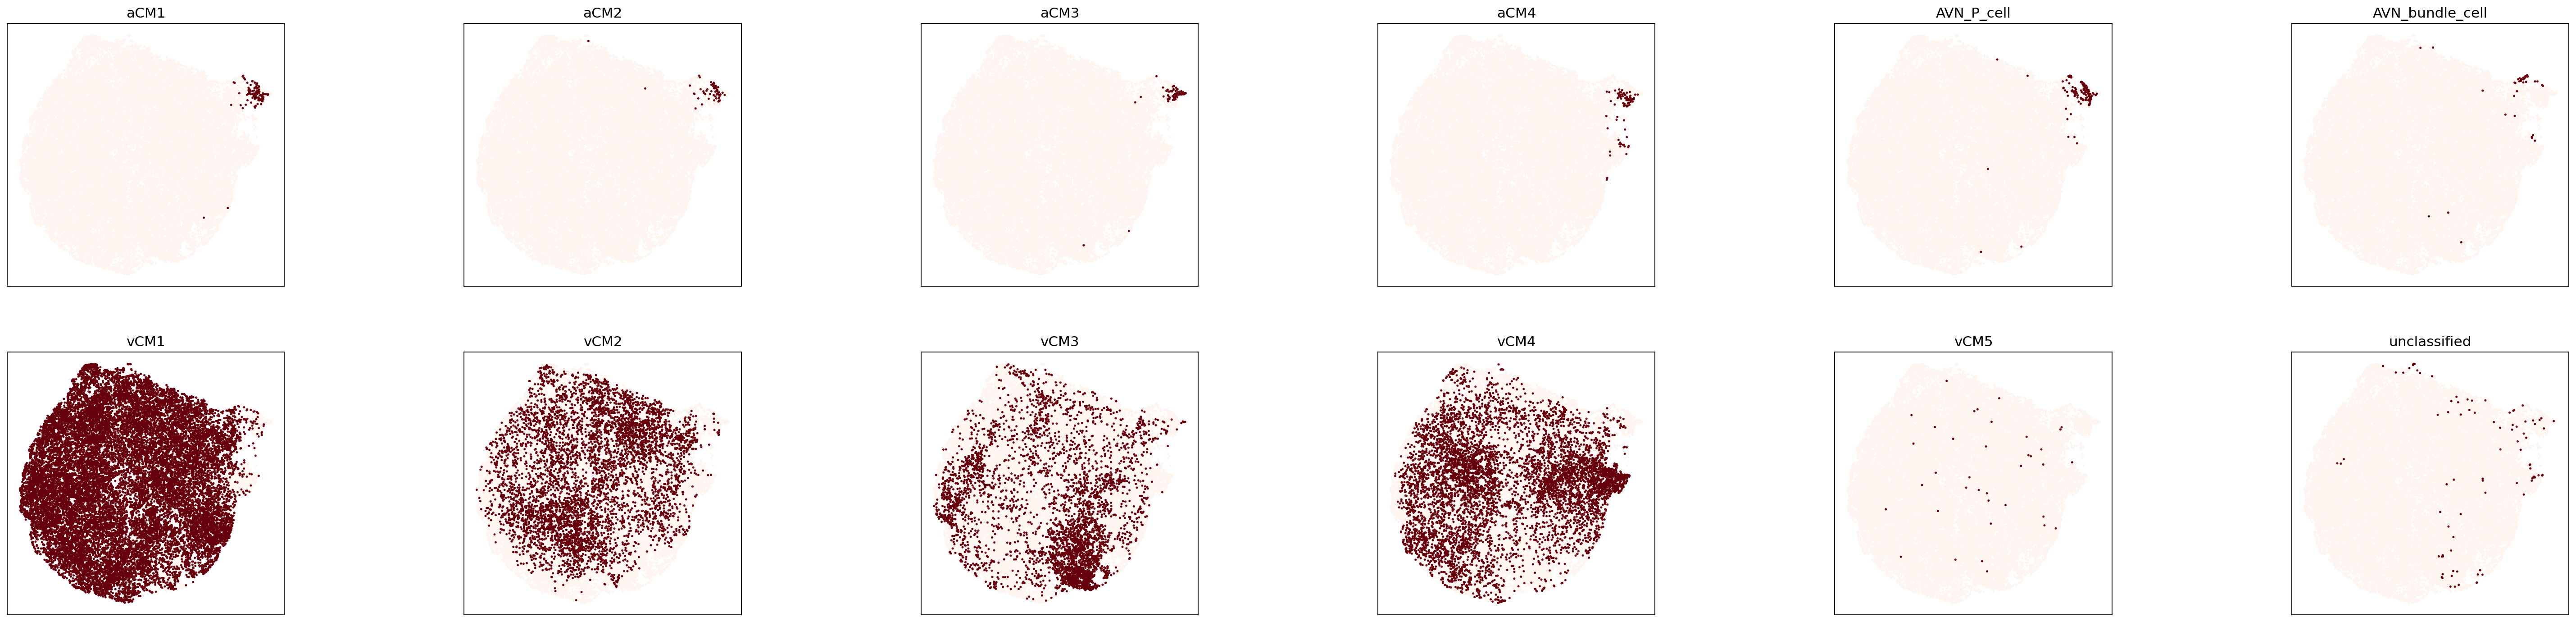

In [127]:
sk.highlight(adata,
             basis="umap",
             groupby="cell_state",
             wspace=0.5, figsize=(5, 5), size=20,
            ncols=6)

In [129]:
sc.tl.rank_genes_groups(adata,
                       groupby='leiden',
                       groups=['8'])

In [131]:
sc.tl.dendrogram(adata,
                       groupby='leiden')

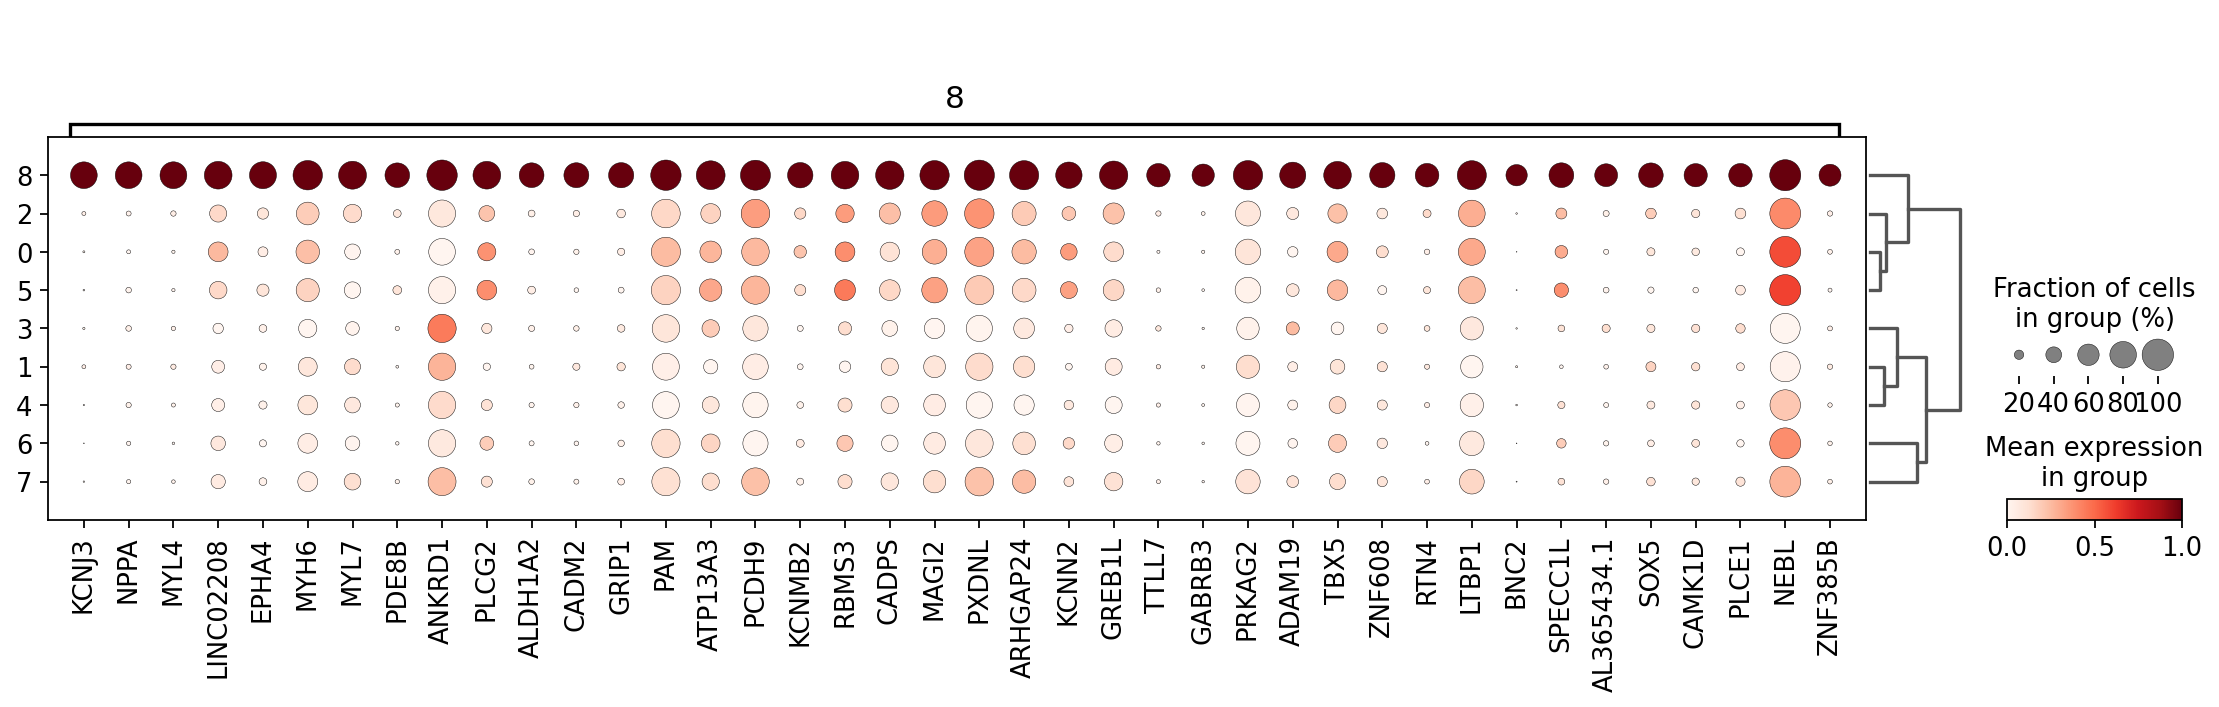

In [132]:
sc.pl.rank_genes_groups_dotplot(adata,
                               groups=['8'],
                               standard_scale='var',
                               n_genes=40)

In [138]:
#Export Purkinje Indexes
suspect_index = adata.obs.index[(adata.obs['leiden'] == '8')&(adata.obs['region'] == 'AX')]
suspect_index = suspect_index.to_frame()
suspect_index.to_csv('/home/jovyan/data/suspect_cell_index.csv', index = False, header=True)